In [2]:
w1 = pd.read_csv('../non-LLJdata/ws_files/vwcent_hub_height_ws.csv')
w2 = pd.read_csv('../non-LLJdata/ws_files/southla_hub_height_ws.csv')
w3 = pd.read_csv('../non-LLJdata/ws_files/swbuoy_hub_height_ws.csv')
w4 = pd.read_csv('../non-LLJdata/ws_files/swcorner_hub_height_ws.csv')
w5 = pd.read_csv('../non-LLJdata/ws_files/nebuoy_hub_height_ws.csv')

wind = pd.concat([w1, w2, w3, w4, w5])

In [3]:
ws = wind['130m ws'].values
wd = wind['130m wd'].values

In [20]:
import metpy.calc as mpcalc
from metpy.units import units

/projects/daqu2831/Lundquist_research/res_env/lib/python3.10/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
mpcalc.wind_direction(0*units('m/s'), 10*units('m/s')).magnitude

array(180.)

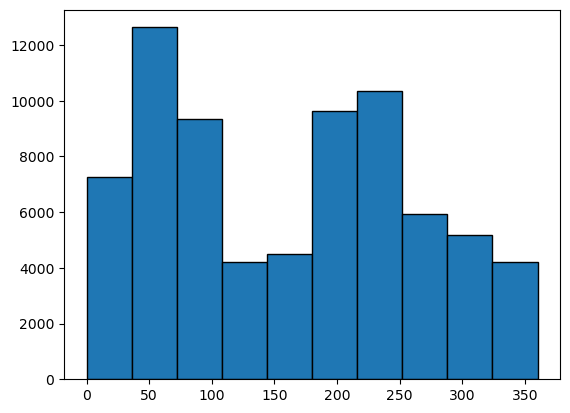

In [6]:
import matplotlib.pyplot as plt
plt.hist(wd, edgecolor='k');

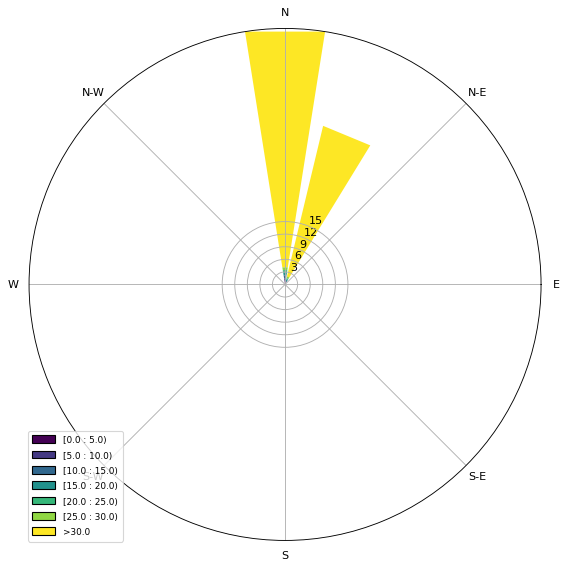

In [12]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

ax = WindroseAxes.from_ax()
ax.bar(wdvw, wsvw, normed=True, bins=np.arange(0, 31, 5))
ax.set_yticks(np.arange(3, 16, 3))
ax.set_yticklabels(np.arange(3, 16, 3))
ax.set_legend()

vwcent


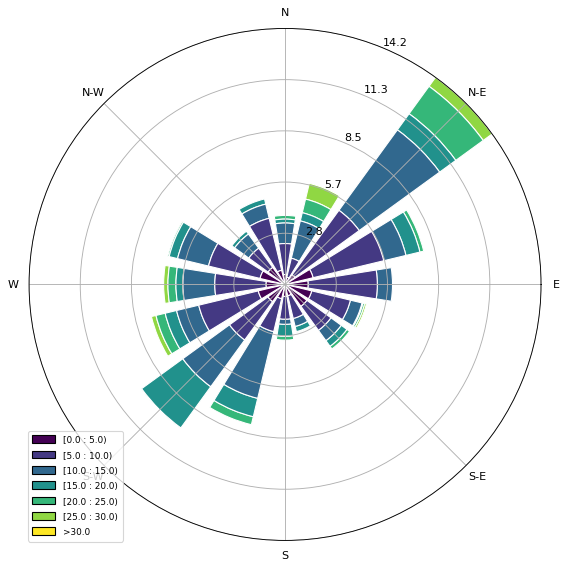

southla


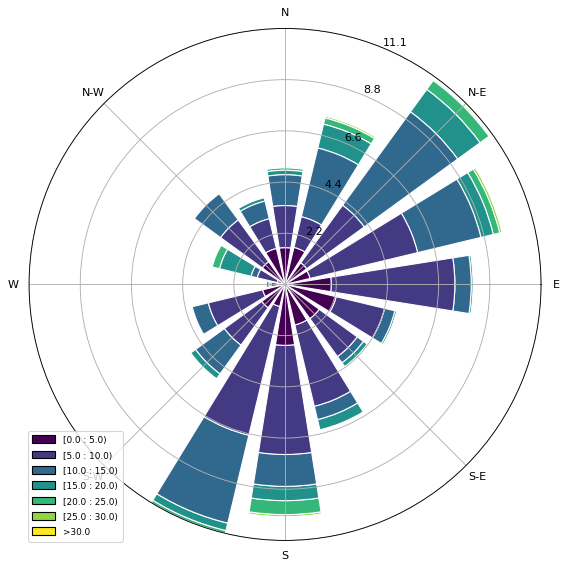

swbuoy


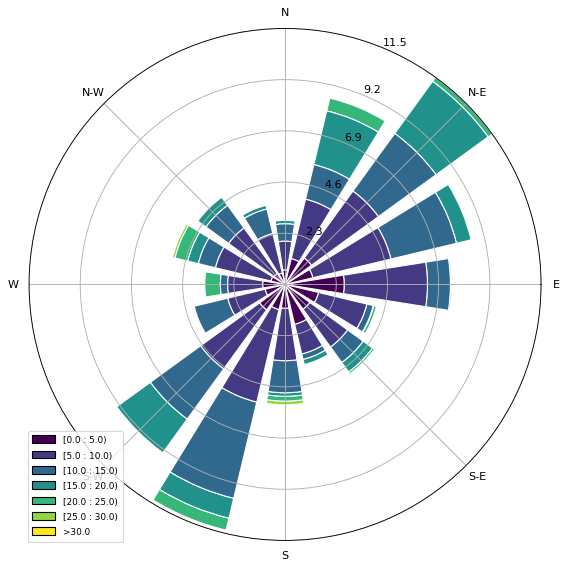

swcorner


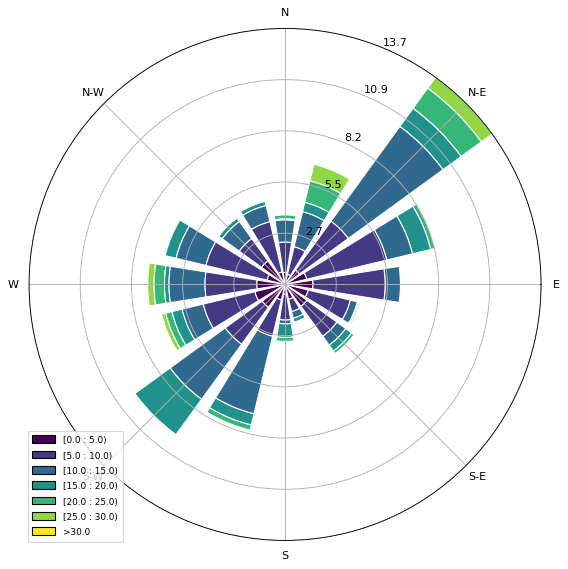

nebuoy


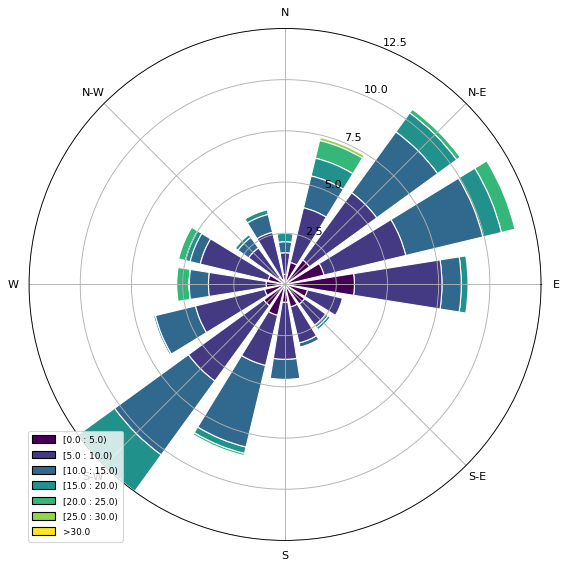

In [8]:
names = ['vwcent', 'southla', 'swbuoy', 'swcorner', 'nebuoy']
for i, w in enumerate([w1, w2, w3, w4, w5]):
    print(names[i])
    ax = WindroseAxes.from_ax()
    ax.bar(w['130m wd'], w['130m ws'], bins=np.arange(0, 31, 5), normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.show()

start here

In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import pandas as pd
import matplotlib.patches as patches
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.io.img_tiles as cimgt
import matplotlib.cm as cm
import windrose
import xarray as xr

In [2]:
# locations [lat, lon]

m_vineyard = [41.39, -70.61]
l_island = [40.71, -73.63]
NE_buoy = [39.97, -72.72]
vw_cent = [40.95, -70.59]
sw_buoy = [39.55, -73.43]
sw_corner = [40.770887, -70.736165]
la_south = [38.348528325, -74.76400249]

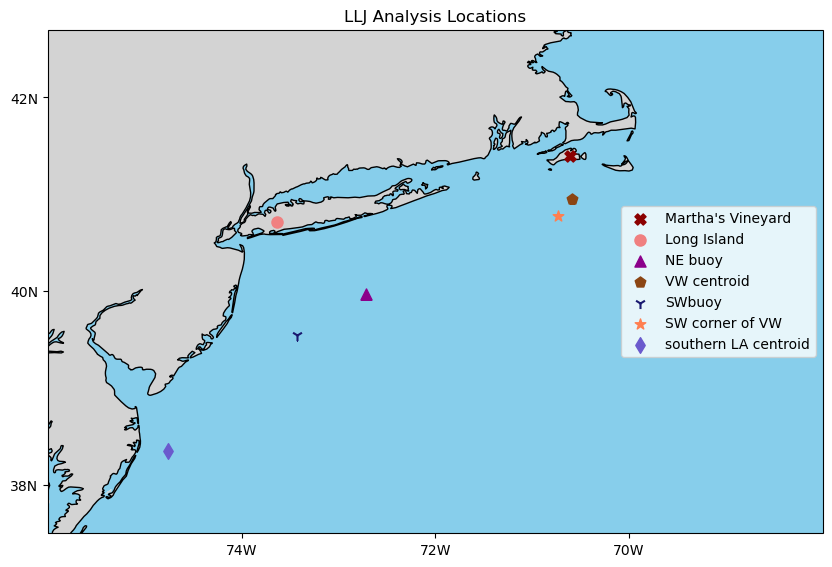

In [4]:
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7])

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='skyblue')

plt.title('LLJ Analysis Locations')
ax.set_xticks(np.arange(-74, -68, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# plot marthas vineyard
ax.scatter(m_vineyard[1], m_vineyard[0], s=64, c='darkred', marker='X', zorder=10, label="Martha's Vineyard")
ax.scatter(l_island[1], l_island[0], s=64, c='lightcoral', marker='o', zorder=10, label="Long Island")
ax.scatter(NE_buoy[1], NE_buoy[0], s=64, c='darkmagenta', marker='^', zorder=10, label="NE buoy")
ax.scatter(vw_cent[1], vw_cent[0], s=64, c='saddlebrown', marker='p', zorder=10, label="VW centroid")
ax.scatter(sw_buoy[1], sw_buoy[0], s=64, c='midnightblue', marker='1', zorder=10, label="SWbuoy")
ax.scatter(sw_corner[1], sw_corner[0], s=64, c='coral', marker='*', zorder=10, label="SW corner of VW")
ax.scatter(la_south[1], la_south[0], s=64, c='slateblue', marker='d', zorder=10, label="southern LA centroid")

plt.legend(loc='center right')

# plt.savefig('LLJ_map.png');

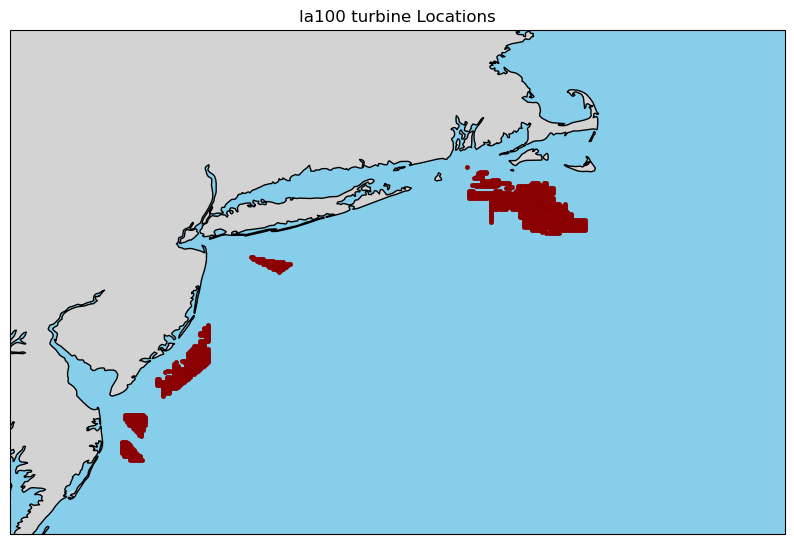

In [4]:
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-76, -68, 37.5, 42.7]) #extent=[-70.9, -70.25, 40.7, 41.2]

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='skyblue')

plt.title('la100 turbine Locations')
# ax.set_xticks(np.arange(-74, -68, 2), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(38, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# plot marthas vineyard
ax.scatter(locs[1], locs[0], s=25, c='darkred', marker='.', zorder=10)

### Make map for paper with locations and wf zones

In [3]:
file_name = "/pl/active/JKL_REAL/N_Atl/reruns_Beiter/wrfouts/nwf/2019/09/wrfout_d02_2019-09-01_00:10:00"
ds = xr.open_dataset(file_name)
print(f'Latitude bounds: {ds.XLAT.min().values:.5f} - {ds.XLAT.max().values:.5f}')
print(f'Longitude bounds: {ds.XLONG.min().values:.5f} - {ds.XLONG.max().values:.5f}')

Latitude bounds: 37.38948 - 42.13687
Longitude bounds: -76.20822 - -64.97662


In [4]:
# load location data for each wf zone
call_area_locs = pd.read_csv('../turbine_locs/ca100_turbines.csv', sep=' ', header=None)
vw_locs = pd.read_csv('../turbine_locs/turbines_vw.csv', sep=' ', header=None)
lease_area_locs = pd.read_csv('../turbine_locs/la100_turbines.csv', sep=' ', header=None)

In [5]:
float(ds.XLAT.min().values)

37.38948440551758

Simple plot for slides

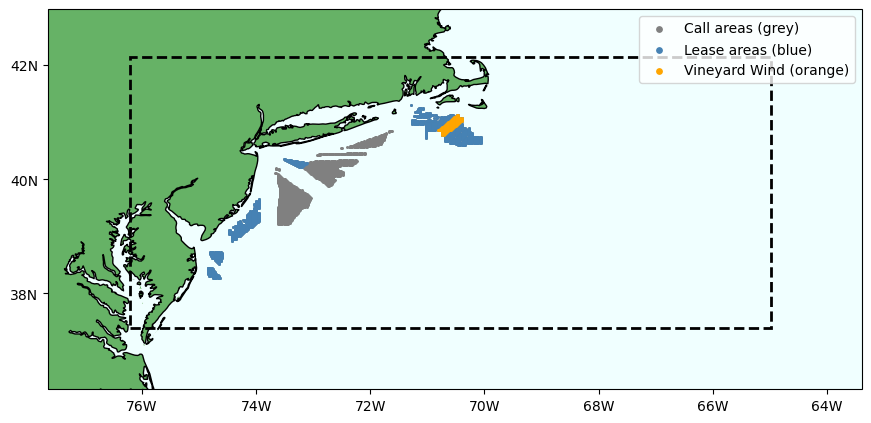

In [22]:
fig = plt.figure(figsize=(10.5,8.8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-77.65, -63.39, 36.319, 42.981])

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='green', alpha=0.6)
ax.add_feature(cfeature.OCEAN, facecolor='azure')

plt.title('')
ax.set_xticks(np.arange(-76, -62, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


# loc_color = 'indianred'
# loc_edge = 'k'
# # plot locs
# ax.scatter(vw_cent[1], vw_cent[0], s=64, c=loc_color, marker='p', edgecolor=loc_edge, zorder=10, label="VWcent")
# ax.scatter(sw_corner[1], sw_corner[0], s=64, c=loc_color, edgecolor=loc_edge, marker='*', zorder=10, label="SWcorner")
# ax.scatter(NE_buoy[1], NE_buoy[0], s=64, c=loc_color, edgecolor=loc_edge, marker='X', zorder=10, label="NEbuoy")
# ax.scatter(sw_buoy[1], sw_buoy[0], s=64, c=loc_color, marker='o', edgecolor=loc_edge, zorder=10, label="SWbuoy")
# ax.scatter(la_south[1], la_south[0], s=64, c=loc_color, marker='^', edgecolor=loc_edge, zorder=10, label="SouthLA")
ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='grey', marker='.', zorder=9, label="Call areas (grey)")
ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='steelblue', marker='.', zorder=9, label="Lease areas (blue)")
ax.scatter(vw_locs[1], vw_locs[0], s=5, c='orange', marker='.', zorder=9, label="Vineyard Wind (orange)")

d = [float(ds.XLONG.min().values),
     float(ds.XLONG.max().values),
     float(ds.XLAT.min().values),
     float(ds.XLAT.max().values)] # xmin, xmax, ymin, ymax
rect = patches.Rectangle((d[0], d[1]), d[2], d[3], linewidth=1, edgecolor='r', facecolor='none')
rect = patches.Rectangle((d[0], d[2]), d[1]-d[0], d[3]-d[2], linewidth=2, edgecolor='k', linestyle='dashed', facecolor='none')

ax.add_patch(rect)

lgnd = ax.legend()

lgnd.legend_handles[0]._sizes = [60]
lgnd.legend_handles[1]._sizes = [60]
lgnd.legend_handles[2]._sizes = [60]

plt.savefig('../output_plots/LLJ_map_domain_simple.png', bbox_inches='tight');

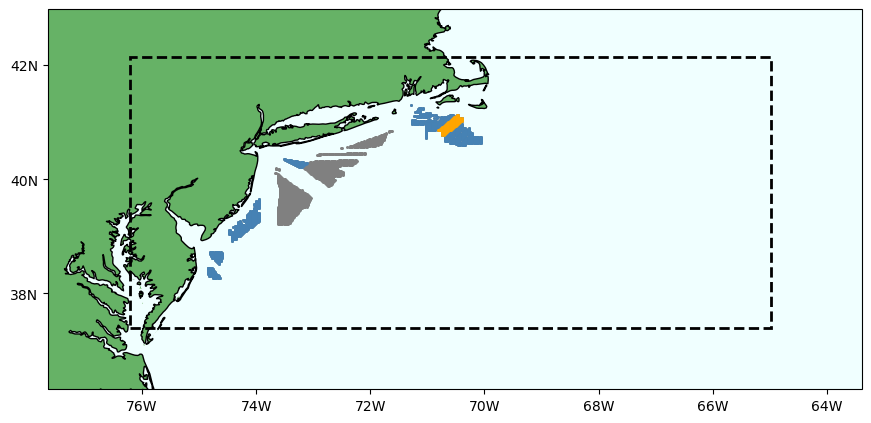

In [10]:
fig = plt.figure(figsize=(10.5,8.8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-77.65, -63.39, 36.319, 42.981])

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='green', alpha=0.6)
ax.add_feature(cfeature.OCEAN, facecolor='azure')

plt.title('')
ax.set_xticks(np.arange(-76, -62, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


# loc_color = 'indianred'
# loc_edge = 'k'
# # plot locs
# ax.scatter(vw_cent[1], vw_cent[0], s=64, c=loc_color, marker='p', edgecolor=loc_edge, zorder=10, label="VWcent")
# ax.scatter(sw_corner[1], sw_corner[0], s=64, c=loc_color, edgecolor=loc_edge, marker='*', zorder=10, label="SWcorner")
# ax.scatter(NE_buoy[1], NE_buoy[0], s=64, c=loc_color, edgecolor=loc_edge, marker='X', zorder=10, label="NEbuoy")
# ax.scatter(sw_buoy[1], sw_buoy[0], s=64, c=loc_color, marker='o', edgecolor=loc_edge, zorder=10, label="SWbuoy")
# ax.scatter(la_south[1], la_south[0], s=64, c=loc_color, marker='^', edgecolor=loc_edge, zorder=10, label="SouthLA")
ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='grey', marker='.', zorder=9, label="Call areas (grey)")
ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='steelblue', marker='.', zorder=9, label="Lease areas (blue)")
ax.scatter(vw_locs[1], vw_locs[0], s=5, c='orange', marker='.', zorder=9, label="ONE (orange)")

d = [float(ds.XLONG.min().values),
     float(ds.XLONG.max().values),
     float(ds.XLAT.min().values),
     float(ds.XLAT.max().values)] # xmin, xmax, ymin, ymax
rect = patches.Rectangle((d[0], d[1]), d[2], d[3], linewidth=1, edgecolor='r', facecolor='none')
rect = patches.Rectangle((d[0], d[2]), d[1]-d[0], d[3]-d[2], linewidth=2, edgecolor='k', linestyle='dashed', facecolor='none')

ax.add_patch(rect)

# lgnd = ax.legend()

# lgnd.legend_handles[0]._sizes = [60]
# lgnd.legend_handles[1]._sizes = [60]
# lgnd.legend_handles[2]._sizes = [60]

plt.savefig('../output_plots/CA_map.png', bbox_inches='tight');

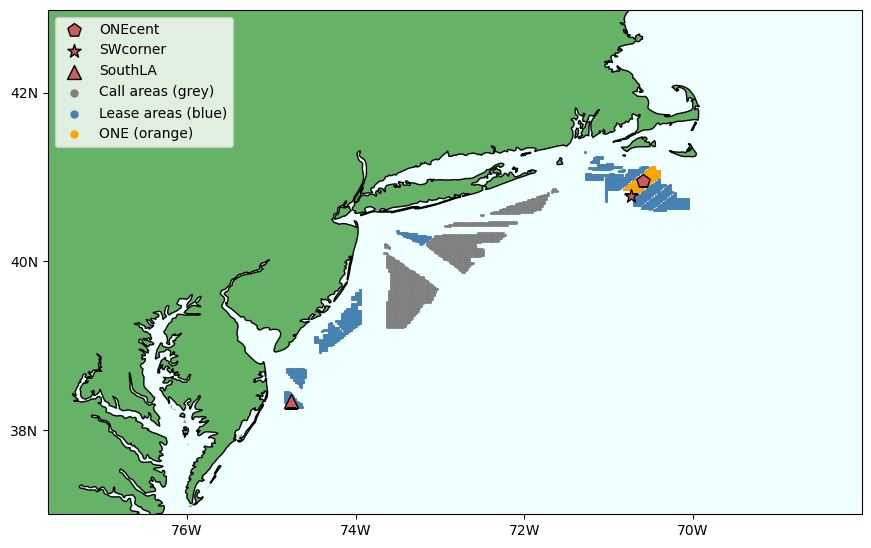

In [18]:
fig = plt.figure(figsize=(10.5,8.8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-77.65, -68, 37, 42.981])

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='green', alpha=0.6)
ax.add_feature(cfeature.OCEAN, facecolor='azure')

plt.title('')
ax.set_xticks(np.arange(-76, -69, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


# loc_color = 'indianred'
# loc_edge = 'k'
# # plot locs
ax.scatter(vw_cent[1], vw_cent[0], s=100, c='indianred', marker='p', edgecolor='k', zorder=10, label="ONEcent")
ax.scatter(sw_corner[1], sw_corner[0], s=100, c='indianred', edgecolor='k', marker='*', zorder=10, label="SWcorner")
# ax.scatter(NE_buoy[1], NE_buoy[0], s=64, c=loc_color, edgecolor=loc_edge, marker='X', zorder=10, label="NEbuoy")
# ax.scatter(sw_buoy[1], sw_buoy[0], s=64, c=loc_color, marker='o', edgecolor=loc_edge, zorder=10, label="SWbuoy")
ax.scatter(la_south[1], la_south[0], s=100, c='indianred', marker='^', edgecolor='k', zorder=10, label="SouthLA")
ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='grey', marker='.', zorder=9, label="Call areas (grey)")
ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='steelblue', marker='.', zorder=9, label="Lease areas (blue)")
ax.scatter(vw_locs[1], vw_locs[0], s=5, c='orange', marker='.', zorder=9, label="ONE (orange)")

# d = [float(ds.XLONG.min().values),
#      float(ds.XLONG.max().values),
#      float(ds.XLAT.min().values),
#      float(ds.XLAT.max().values)] # xmin, xmax, ymin, ymax
# rect = patches.Rectangle((d[0], d[1]), d[2], d[3], linewidth=1, edgecolor='r', facecolor='none')
# rect = patches.Rectangle((d[0], d[2]), d[1]-d[0], d[3]-d[2], linewidth=2, edgecolor='k', linestyle='dashed', facecolor='none')

# ax.add_patch(rect)

lgnd = ax.legend(loc=2)

lgnd.legend_handles[3]._sizes = [100]
lgnd.legend_handles[4]._sizes = [100]
lgnd.legend_handles[2]._sizes = [100]
lgnd.legend_handles[5]._sizes = [100]

plt.savefig('../output_plots/LLJ_map_domain_ams.png', bbox_inches='tight');

Make wind rose

In [5]:
wind_vwcent = pd.read_csv('../make_wr/vwcent_wind.csv')
wind_sla = pd.read_csv('../make_wr/southla_wind.csv')

In [6]:
wdvw = wind_vwcent['130m wd']
wsvw = wind_vwcent['130m ws']

wdsl = wind_sla['130m wd']
wssl = wind_sla['130m ws']

current code

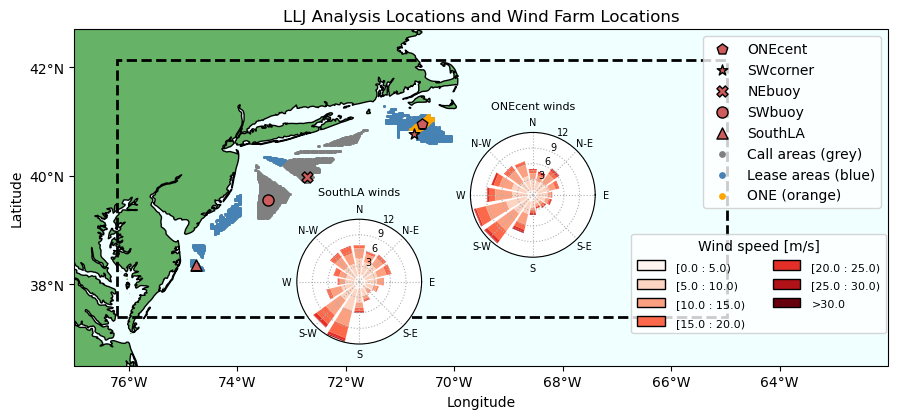

In [7]:
fig = plt.figure(figsize=(10.5,8.8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-77, -62, 36.5, 42.7])

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='green', alpha=0.6)
ax.add_feature(cfeature.OCEAN, facecolor='azure')

plt.title('LLJ Analysis Locations and Wind Farm Locations')
ax.set_xticks(np.arange(-76, -62, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


loc_color = 'indianred'
loc_edge = 'k'
# plot locs
ax.scatter(vw_cent[1], vw_cent[0], s=64, c=loc_color, marker='p', edgecolor=loc_edge, zorder=10, label="ONEcent")
ax.scatter(sw_corner[1], sw_corner[0], s=64, c=loc_color, edgecolor=loc_edge, marker='*', zorder=10, label="SWcorner")
ax.scatter(NE_buoy[1], NE_buoy[0], s=64, c=loc_color, edgecolor=loc_edge, marker='X', zorder=10, label="NEbuoy")
ax.scatter(sw_buoy[1], sw_buoy[0], s=64, c=loc_color, marker='o', edgecolor=loc_edge, zorder=10, label="SWbuoy")
ax.scatter(la_south[1], la_south[0], s=64, c=loc_color, marker='^', edgecolor=loc_edge, zorder=10, label="SouthLA")
ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='grey', marker='.', zorder=9, label="Call areas (grey)")
ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='steelblue', marker='.', zorder=9, label="Lease areas (blue)")
ax.scatter(vw_locs[1], vw_locs[0], s=5, c='orange', marker='.', zorder=9, label="ONE (orange)")

# plot domain
# plt.axvline(ds.XLONG.min().values, color='k', linewidth=4)
# plt.axvline(ds.XLONG.max().values)
# plt.axhline(ds.XLAT.min().values)
# plt.axhline(ds.XLAT.max().values)
d = [float(ds.XLONG.min().values),
     float(ds.XLONG.max().values),
     float(ds.XLAT.min().values),
     float(ds.XLAT.max().values)] # xmin, xmax, ymin, ymax
rect = patches.Rectangle((d[0], d[1]), d[2], d[3], linewidth=1, edgecolor='r', facecolor='none')
rect = patches.Rectangle((d[0], d[2]), d[1]-d[0], d[3]-d[2], linewidth=2, edgecolor='k', linestyle='dashed', facecolor='none')

ax.add_patch(rect)

lgnd = plt.legend(loc=1) # 7

lgnd.legend_handles[5]._sizes = [60]
lgnd.legend_handles[6]._sizes = [60]
lgnd.legend_handles[7]._sizes = [60]

# plot vineyard winds 
wrax_vw = ax.inset_axes(bounds=[-69.7, 38.5, 2.3, 2.3], transform=ax.transData, axes_class=windrose.WindroseAxes)
wrax_vw.grid(linestyle='dotted')
wrax_vw.bar(wdvw, wsvw, bins=np.arange(0, 31, 5), normed=True, cmap=cm.Reds)
wrax_vw.set_title('ONEcent winds', fontsize=8)

# plot southern lease area
wrax_sl = ax.inset_axes(bounds=[-72.9, 36.9, 2.3, 2.3], transform=ax.transData, axes_class=windrose.WindroseAxes)
wrax_sl.grid(linestyle='dotted')
wrax_sl.bar(wdsl, wssl, bins=np.arange(0, 31, 5), normed=True, cmap=cm.Reds)
wrax_sl.set_title('SouthLA winds', fontsize=8)

# style ticks etc for both wind roses
for wrax in [wrax_vw, wrax_sl]:
    wrax.set_yticks(np.arange(3, 15, 3))
    wrax.set_yticklabels(np.arange(3, 15, 3), fontsize=7);
    wrax.tick_params(axis='x', which='major', pad=-3, labelsize=7);

wrax_vw.set_legend(bbox_to_anchor=(1.3, -0.6), ncol=2, title='Wind speed [m/s]')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('../output_plots/LLJ_map_domain_wr2.png', bbox_inches='tight');

old version

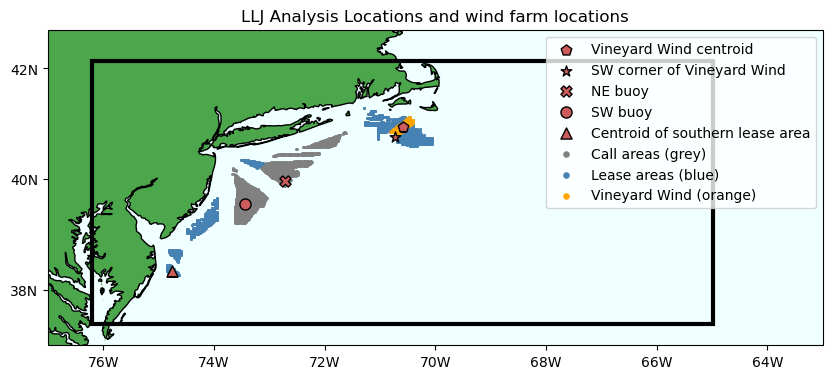

In [10]:
fig = plt.figure(figsize=(10,8))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection, extent=[-77, -63, 37, 42.7])

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='green', alpha=0.7)
ax.add_feature(cfeature.OCEAN, facecolor='azure')

plt.title('LLJ Analysis Locations and wind farm locations')
ax.set_xticks(np.arange(-76, -62, 2), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38, 44, 2), crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(degree_symbol='')
lat_formatter = LatitudeFormatter(degree_symbol='')

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


loc_color = 'indianred'
loc_edge = 'k'
# plot locs
ax.scatter(vw_cent[1], vw_cent[0], s=64, c=loc_color, marker='p', edgecolor=loc_edge, zorder=10, label="Vineyard Wind centroid")
ax.scatter(sw_corner[1], sw_corner[0], s=64, c=loc_color, edgecolor=loc_edge, marker='*', zorder=10, label="SW corner of Vineyard Wind")
ax.scatter(NE_buoy[1], NE_buoy[0], s=64, c=loc_color, edgecolor=loc_edge, marker='X', zorder=10, label="NE buoy")
ax.scatter(sw_buoy[1], sw_buoy[0], s=64, c=loc_color, marker='o', edgecolor=loc_edge, zorder=10, label="SW buoy")
ax.scatter(la_south[1], la_south[0], s=64, c=loc_color, marker='^', edgecolor=loc_edge, zorder=10, label="Centroid of southern lease area")
ax.scatter(call_area_locs[1], call_area_locs[0], s=5, c='grey', marker='.', zorder=9, label="Call areas (grey)")
ax.scatter(lease_area_locs[1], lease_area_locs[0], s=5, c='steelblue', marker='.', zorder=9, label="Lease areas (blue)")
ax.scatter(vw_locs[1], vw_locs[0], s=5, c='orange', marker='.', zorder=9, label="Vineyard Wind (orange)")

# plot domain
# plt.axvline(ds.XLONG.min().values, color='k', linewidth=4)
# plt.axvline(ds.XLONG.max().values)
# plt.axhline(ds.XLAT.min().values)
# plt.axhline(ds.XLAT.max().values)
d = [float(ds.XLONG.min().values),
     float(ds.XLONG.max().values),
     float(ds.XLAT.min().values),
     float(ds.XLAT.max().values)] # xmin, xmax, ymin, ymax
rect = patches.Rectangle((d[0], d[1]), d[2], d[3], linewidth=1, edgecolor='r', facecolor='none')
rect = patches.Rectangle((d[0], d[2]), d[1]-d[0], d[3]-d[2], linewidth=3, edgecolor='k', facecolor='none')

ax.add_patch(rect)

lgnd = plt.legend(loc=1)

lgnd.legend_handles[5]._sizes = [55]
lgnd.legend_handles[6]._sizes = [55]
lgnd.legend_handles[7]._sizes = [55]

# plt.savefig('../output_plots/LLJ_map_domain.png');

In [11]:
# add the inset axes
# wrax_cham = inset_axes(ax,
#                        width=1.7,                             # size in inches
#                        height=1.7,                            # size in inches
#                        loc='center',                        # center bbox at given position
#                        bbox_to_anchor=(-70.5, 38.4),#(-71.1, 38.9), # position
#                        bbox_transform=ax.transData,    # use data coordinate (not axe coordinate)
#                        axes_class=windrose.WindroseAxes    # specify the class of the axe
#                        )